In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import numpy as np 

In [5]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None, 
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [6]:
Validation_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 86.5   76.25  84.5 ]
   [ 87.    77.5   85.  ]
   [ 89.75  80.25  87.75]
   ...
   [ 92.75  82.75  89.75]
   [ 87.    77.75  84.  ]
   [ 83.75  73.75  80.75]]

  [[171.75 159.75 169.75]
   [168.75 156.75 166.75]
   [167.25 155.25 165.25]
   ...
   [138.25 127.25 135.25]
   [154.75 143.75 151.75]
   [176.25 165.25 173.25]]

  [[181.   169.   179.  ]
   [181.   169.   179.  ]
   [173.75 161.75 171.75]
   ...
   [154.   143.   151.  ]
   [179.   168.   176.  ]
   [151.25 140.25 148.25]]

  ...

  [[187.25 176.25 184.25]
   [189.25 178.25 186.25]
   [180.75 169.75 177.75]
   ...
   [151.25 136.25 143.25]
   [166.   151.   158.  ]
   [141.25 126.25 133.25]]

  [[198.   187.   195.  ]
   [185.   174.   182.  ]
   [202.75 191.75 199.75]
   ...
   [159.75 144.75 151.75]
   [153.5  138.5  145.5 ]
   [172.5  157.5  164.5 ]]

  [[175.75 164.75 172.75]
   [197.   186.   194.  ]
   [193.25 182.25 190.25]
   ...
   [154.   139.   146.  ]
   [170.   155.   162.  ]
   [169.5  154.5  16

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [10]:
model=Sequential()#training speed ko boost karne ke liye padding hata di hai 2nd layer me se

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.40))

In [20]:
model.add(Dense(units=38,activation='softmax'))#for each class it will give an output as we need output in probability form

1.phele loss function badh raha tha fir humne kam karne ke liye alag code kara 
2.choose small learning rate 
3.their may be the chance of underfitting so increase the number of neuron 
4.add more Convolution layer to extract more features from images there may be possibility that the model unable to capture relevent features or model is confusing due to lack of features so feed with more features

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
training_history=model.fit(x=training_set,validation_data=Validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - accuracy: 0.4048 - loss: 2.1164 - val_accuracy: 0.8510 - val_loss: 0.4778
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.8411 - loss: 0.5055 - val_accuracy: 0.9209 - val_loss: 0.2531
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9087 - loss: 0.2831 - val_accuracy: 0.9444 - val_loss: 0.1745
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9350 - loss: 0.1913 - val_accuracy: 0.9505 - val_loss: 0.1595
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9548 - loss: 0.1394 - val_accuracy: 0.9483 - val_loss: 0.1614
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9631 - loss: 0.1155 - val_accuracy: 0.9593 - val_loss: 0.1292
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9682 - loss: 0.0986 - val_accuracy: 0.9562 - val_loss: 0.1468
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9767 

In [24]:
model.save("trained_model.h5")
from tensorflow.keras.models import load_model
loaded_model = load_model("trained_model.h5")

In [25]:
import pickle
with open("training_history.pkl", "wb") as file:
    pickle.dump(training_history.history, file)
with open("training_history.pkl", "rb") as file:
    loaded_history = pickle.load(file)

In [26]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model("/kaggle/input/plant-disease-model/trained_model.keras")


In [27]:
#model evaluation on training set 
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.9554 - loss: 0.1417
Training accuracy: 0.9552173018455505


In [28]:
print(train_loss,train_acc)

0.14198468625545502 0.9552173018455505


In [29]:
val_loss, val_acc = model.evaluate(Validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9271 - loss: 0.2702
Validation accuracy: 0.9226041436195374


In [30]:
print(val_loss,val_acc)

0.27457675337791443 0.9226041436195374


In [31]:
#saving model
model.save("trained_model.keras")#updated way to save the model

In [32]:
import os

print(os.listdir())  # Lists files in the current directory


['trained_model.h5', 'trained_model.keras', '.virtual_documents', 'training_history.pkl']


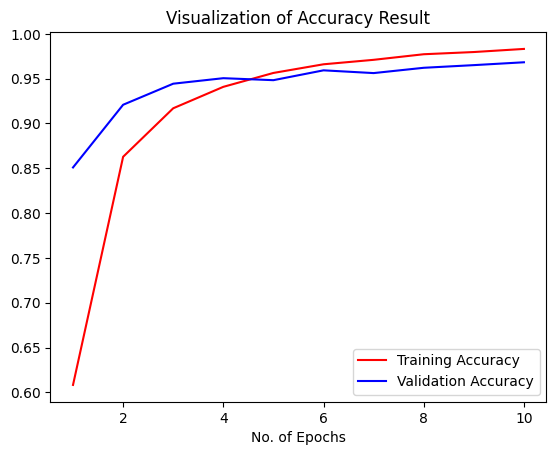

In [34]:
#accuracy visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [35]:
#some other mertices for model evaluation
class_name = Validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step


(array([[9.99998450e-01, 3.84383237e-12, 1.13565025e-11, ...,
         1.56686299e-16, 1.55605882e-15, 1.00178248e-13],
        [9.99262273e-01, 8.92355800e-10, 3.90103416e-09, ...,
         6.96001037e-13, 4.14218139e-12, 9.05315493e-12],
        [1.00000000e+00, 4.04826861e-14, 3.21310361e-13, ...,
         2.31733460e-19, 3.86967581e-18, 4.49821759e-15],
        ...,
        [6.89653294e-15, 2.80131630e-17, 8.90004459e-11, ...,
         7.45880781e-15, 4.11520488e-14, 1.00000000e+00],
        [9.25706126e-13, 4.57889452e-15, 1.16619936e-10, ...,
         1.78758809e-12, 2.31084574e-12, 9.99999881e-01],
        [5.83381704e-13, 9.00374407e-14, 9.56928373e-12, ...,
         2.02314727e-13, 2.07127301e-11, 9.99998569e-01]], dtype=float32),
 (17572, 38))

In [38]:

predicted_categories = tf.argmax(y_pred, axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

Precision 
The proportion of correct positive predictions
Also known as positive predictive value (PPV)
Recall 
The proportion of actual positives that are correctly identified
Also known as true positive rate or sensitivity
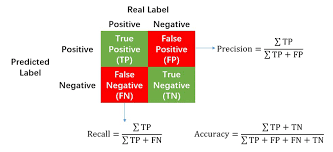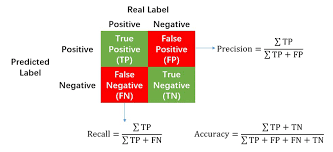

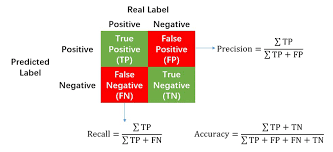
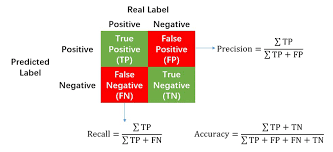

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [43]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.87      0.92       504
                                 Apple___Black_rot       1.00      0.92      0.96       497
                          Apple___Cedar_apple_rust       0.94      0.80      0.86       440
                                   Apple___healthy       0.89      0.94      0.91       502
                               Blueberry___healthy       0.97      0.90      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.87      0.98      0.92       421
                 Cherry_(including_sour)___healthy       1.00      0.93      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.91      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.88      0.

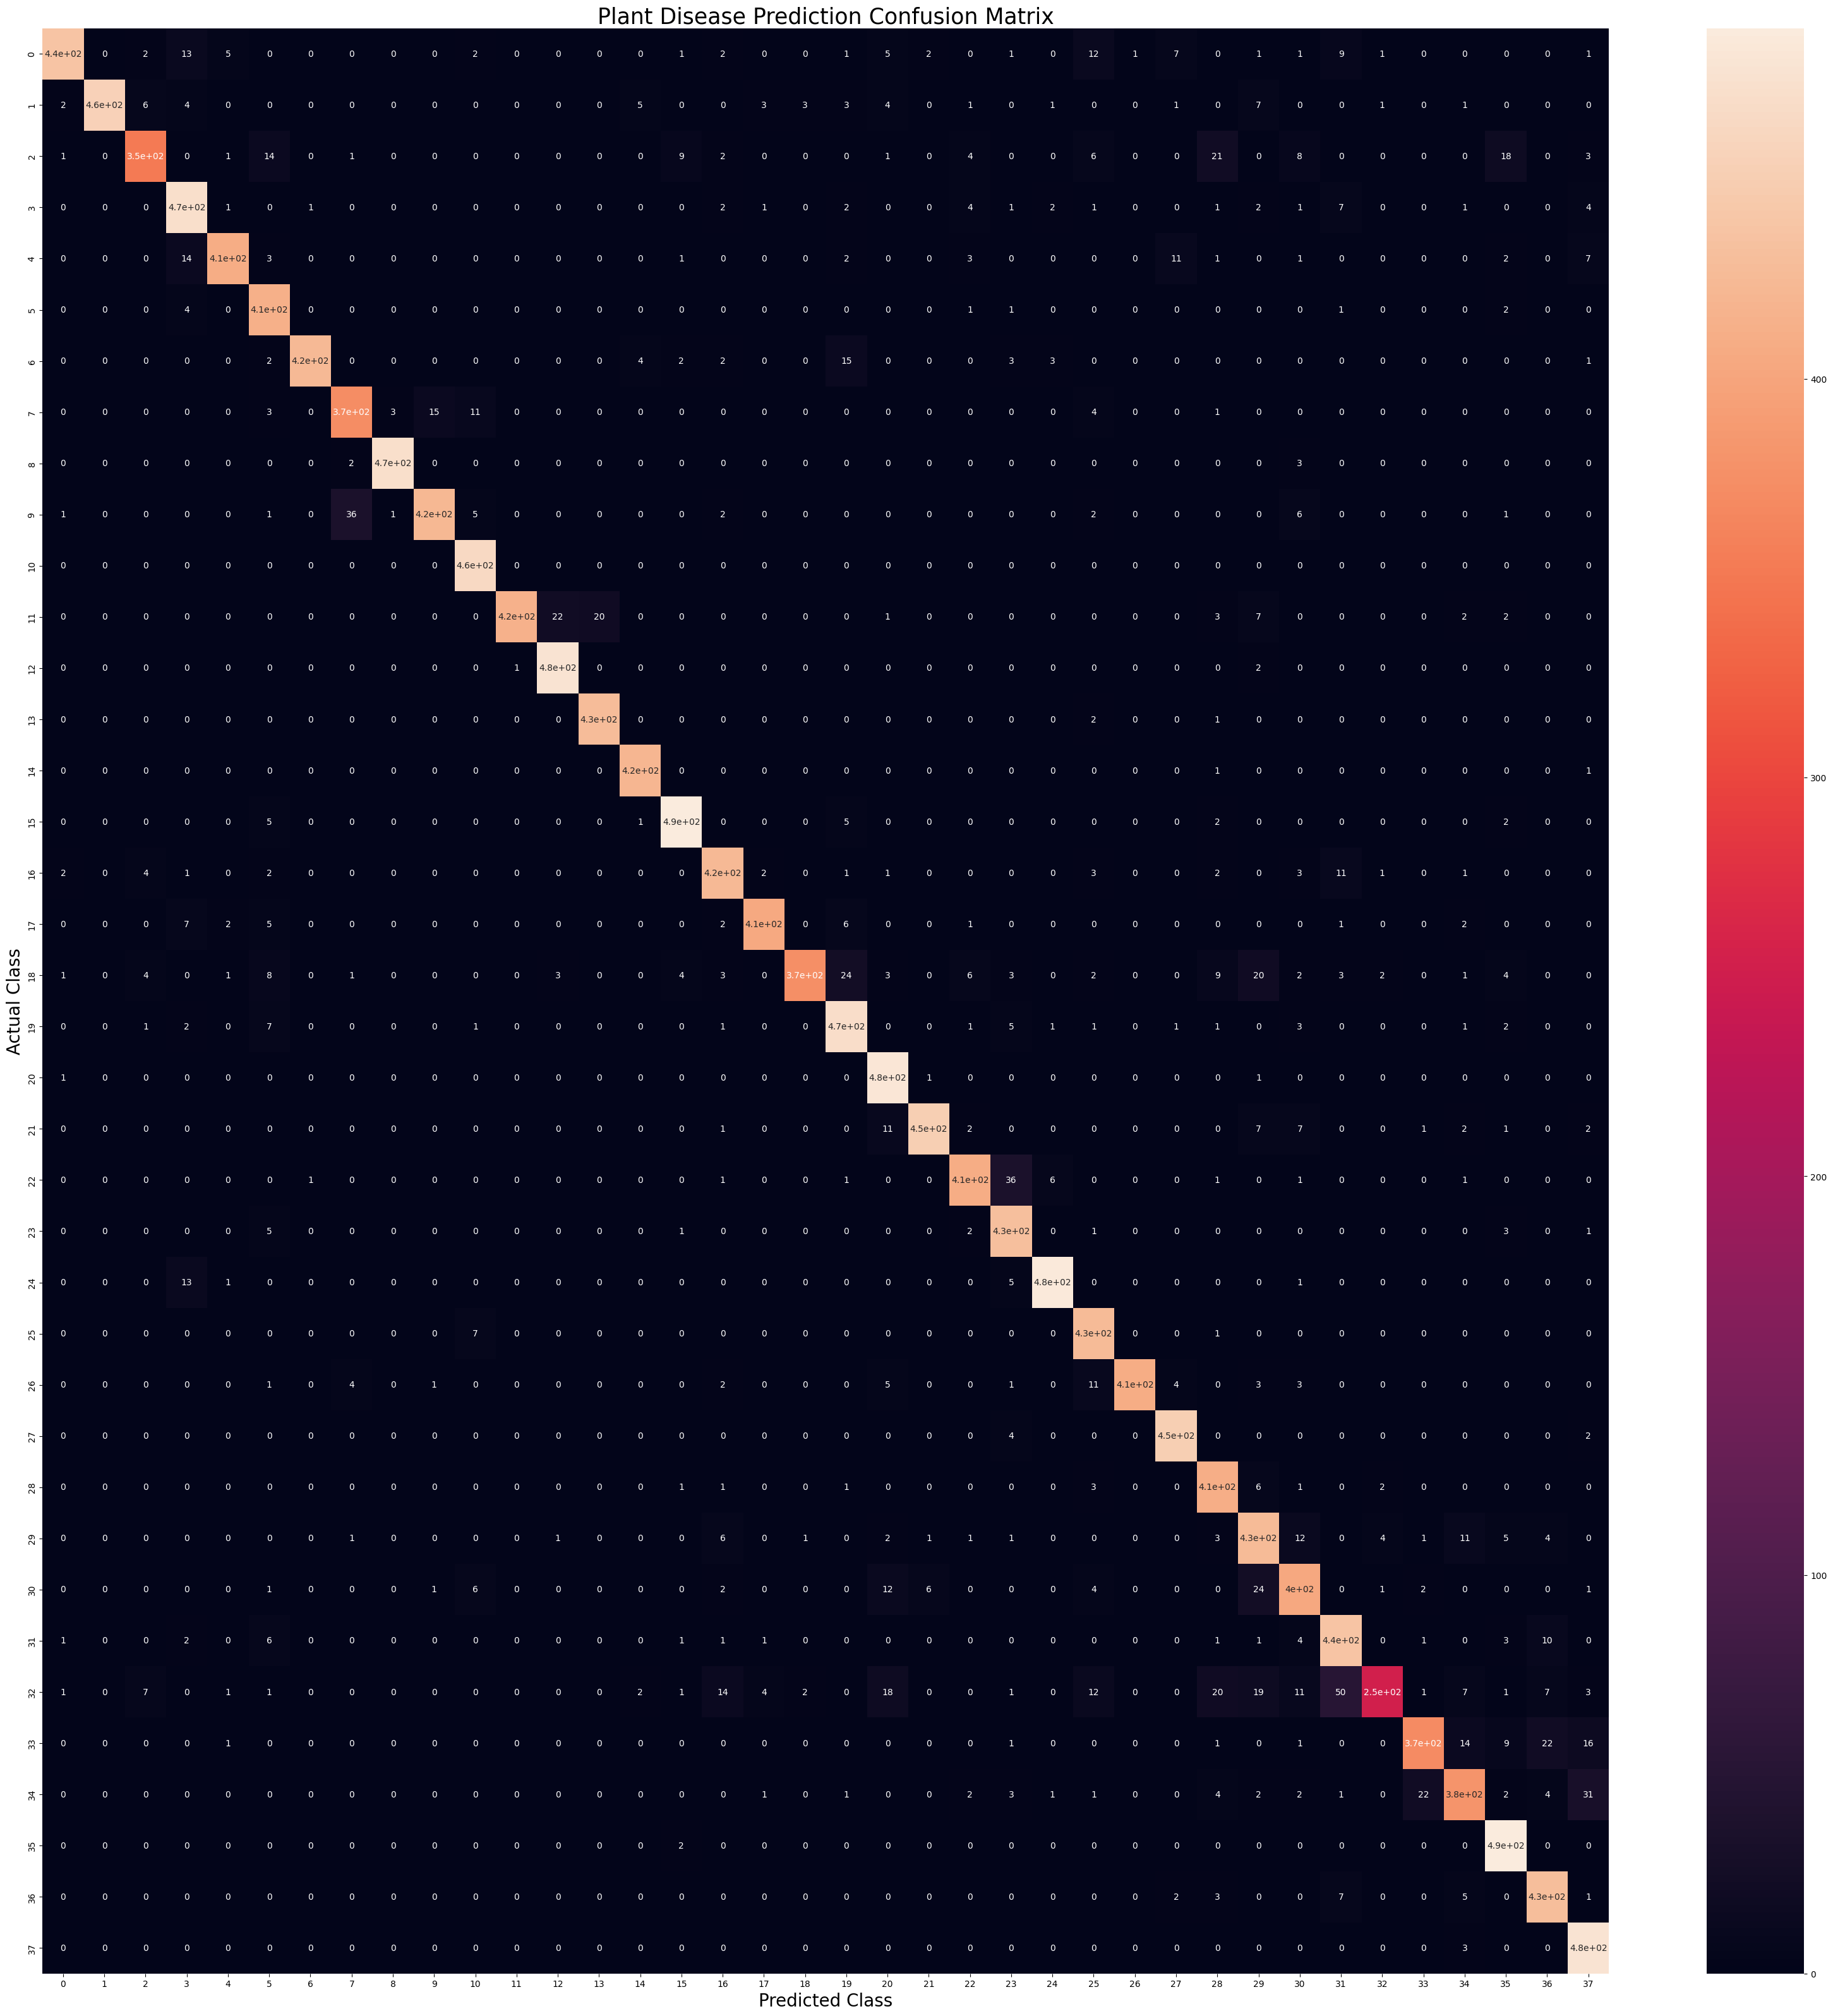

In [44]:
#confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()